# Assignment 4
Analyzing the "ufo_sightings.csv" dataset to identify trends, patterns, and characteristics of UFO sightings. The analysis includes data loading, cleaning, missing value imputation, feature engineering, univariate and bivariate analysis, trend analysis, advanced visualizations (including geographical distribution), shape analysis, and a summary of conclusions and recommendations.

In [107]:
#%pip install -r requirements.txt

## Data loading

In [108]:
import pandas as pd
import numpy as np
df = pd.read_csv("ufo_sightings.csv", low_memory=False)
print(df.info())
print("head rows\n",df.head())
print("shape of data", df.shape)
print("columns in data", df.columns)
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  longitude             80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB
None
head rows
               datetime                  city state country     shape  \
0  1949-10-10 20:30:00            san marcos    tx      us  cylinder   
1  1949-10-10 2

The data has been loaded successfully and we have inspected the first few rows, the shape, columns, and descriptive statistics. 

In [109]:
print(df.duplicated().sum())

0


There are no duplicate rows in the dataset.

## Missing value imputation

Numerical columns with missing values: []

Since there are no numerical columns with missing values, we proceed to fill the missing values in categorical columns.

In [110]:
# Fill the missing values in categorical columns ('country', 'state', 'shape', 'comments') with 'unknown' or empty string.
df['country'] = df['country'].fillna('unknown')
df['state'] = df['state'].fillna('unknown')
df['shape'] = df['shape'].fillna('unknown')
df['comments'] = df['comments'].fillna('')

# Verify that there are no remaining missing values in the specified columns.
print("Missing values after filling categorical columns:")
print(df[['country', 'state', 'shape', 'comments']].isnull().sum())

Missing values after filling categorical columns:
country     0
state       0
shape       0
comments    0
dtype: int64


Missing values in categorical columns have been successfully filled.

## Feature engineering

In [111]:
# Convert 'datetime' column to proper datetime format, coercing errors
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

# Extract year, month, and hour into new columns
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['hour'] = df['datetime'].dt.hour

# Convert 'duration (seconds)' to numeric, coercing errors and filling NaNs
df['duration (seconds)'] = pd.to_numeric(df['duration (seconds)'], errors='coerce').fillna(0)

# Create categorical bins for duration (example bins, adjust as needed)
# Using quantiles to define bins for duration
duration_bins = df['duration (seconds)'].quantile([0, 0.25, 0.5, 0.75, 1])
df['duration_category'] = pd.cut(df['duration (seconds)'], bins=duration_bins, labels=['short', 'medium', 'long', 'very_long'], include_lowest=True)

# Display the first few rows with new features and their data types
print(df[['datetime', 'year', 'month', 'hour', 'duration (seconds)', 'duration_category']].head())
print("\nData types of new features:")
print(df[['datetime', 'year', 'month', 'hour', 'duration (seconds)', 'duration_category']].dtypes)

             datetime    year  month  hour  duration (seconds)  \
0 1949-10-10 20:30:00  1949.0   10.0  20.0              2700.0   
1 1949-10-10 21:00:00  1949.0   10.0  21.0              7200.0   
2 1955-10-10 17:00:00  1955.0   10.0  17.0                20.0   
3 1956-10-10 21:00:00  1956.0   10.0  21.0                20.0   
4 1960-10-10 20:00:00  1960.0   10.0  20.0               900.0   

  duration_category  
0         very_long  
1         very_long  
2             short  
3             short  
4         very_long  

Data types of new features:
datetime              datetime64[ns]
year                         float64
month                        float64
hour                         float64
duration (seconds)           float64
duration_category           category
dtype: object


New features for year, month, hour, and duration category have been successfully created.

## Univariate analysis

<ipython-input-112-614285505>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='year', palette='viridis')


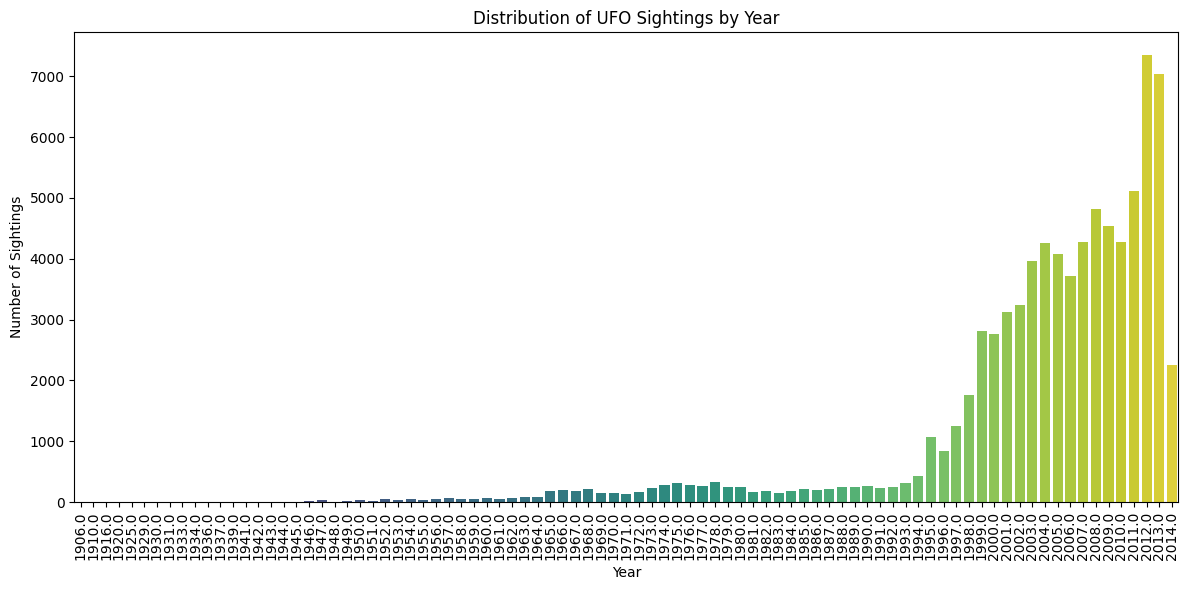

<ipython-input-112-614285505>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='month', palette='viridis')


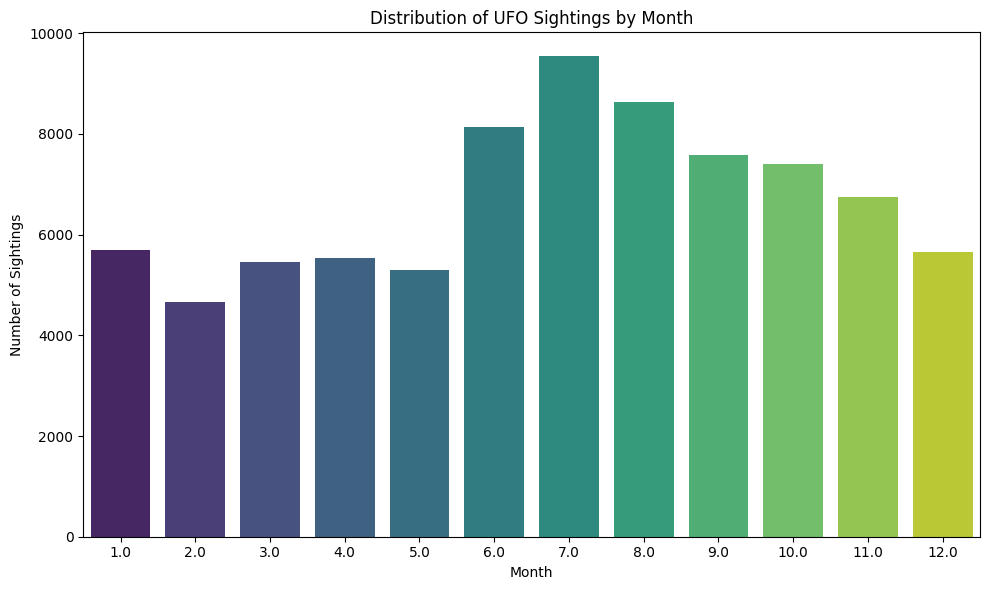

<ipython-input-112-614285505>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='hour', palette='viridis')


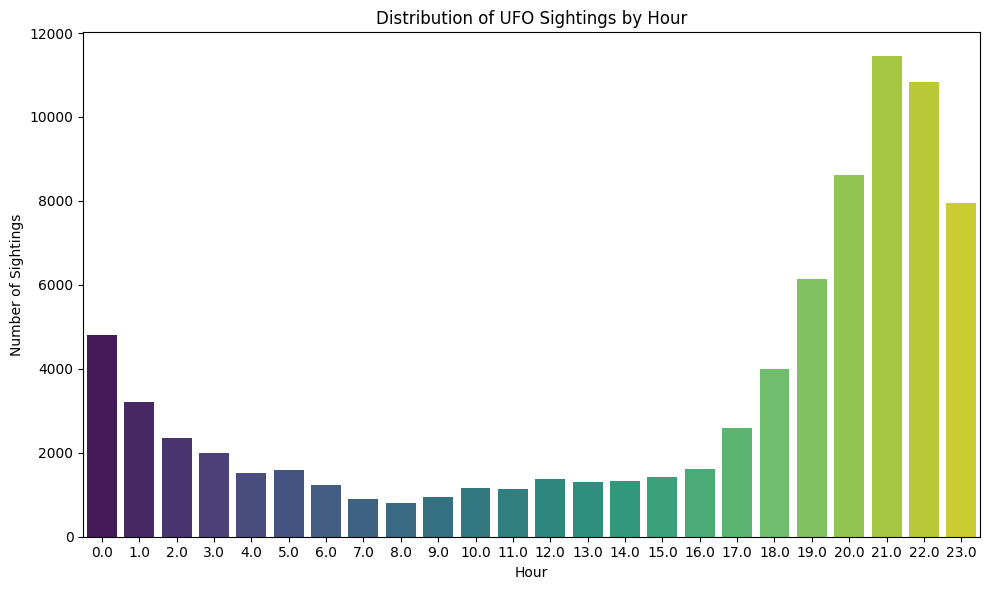

<ipython-input-112-614285505>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='shape', order=df['shape'].value_counts().index[:10], palette='viridis')


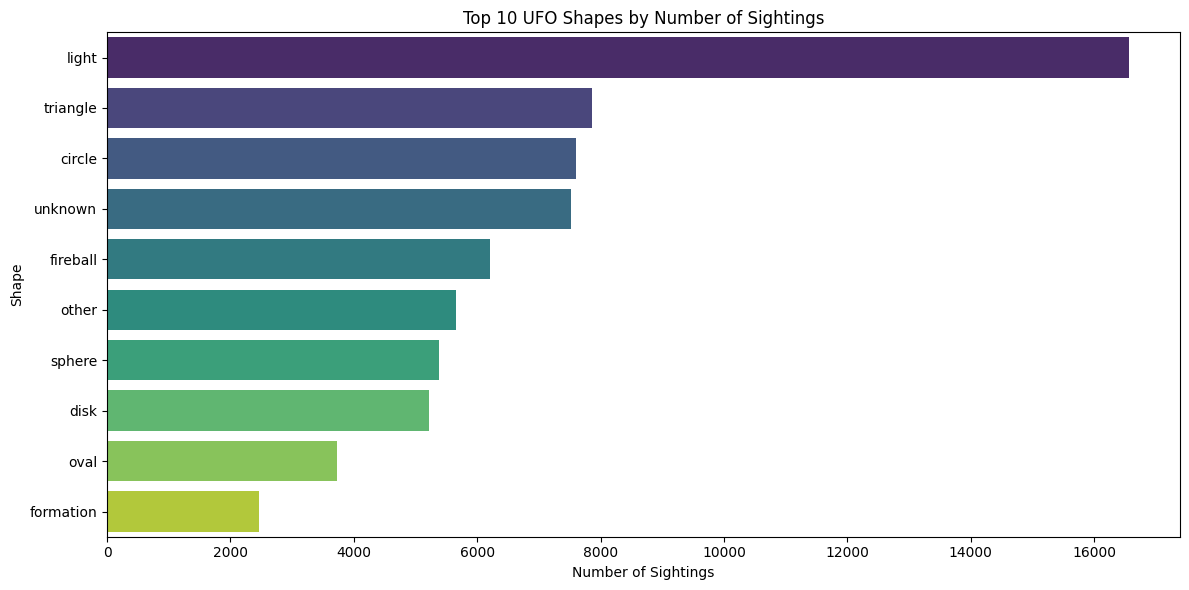

<ipython-input-112-614285505>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='country', order=df['country'].value_counts().index[:10], palette='viridis')


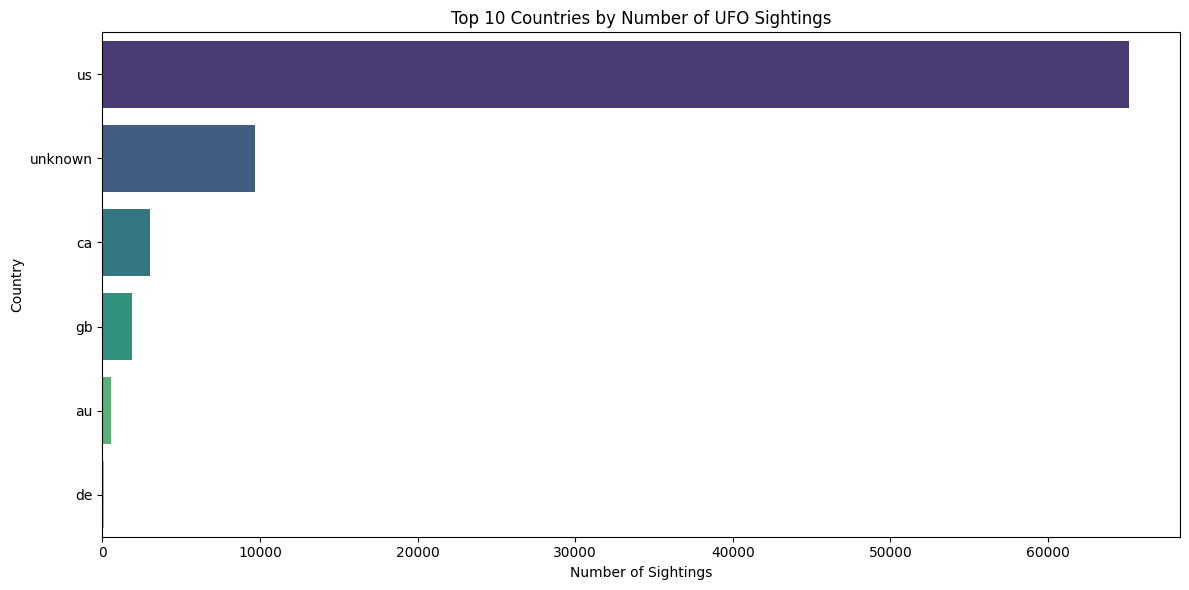

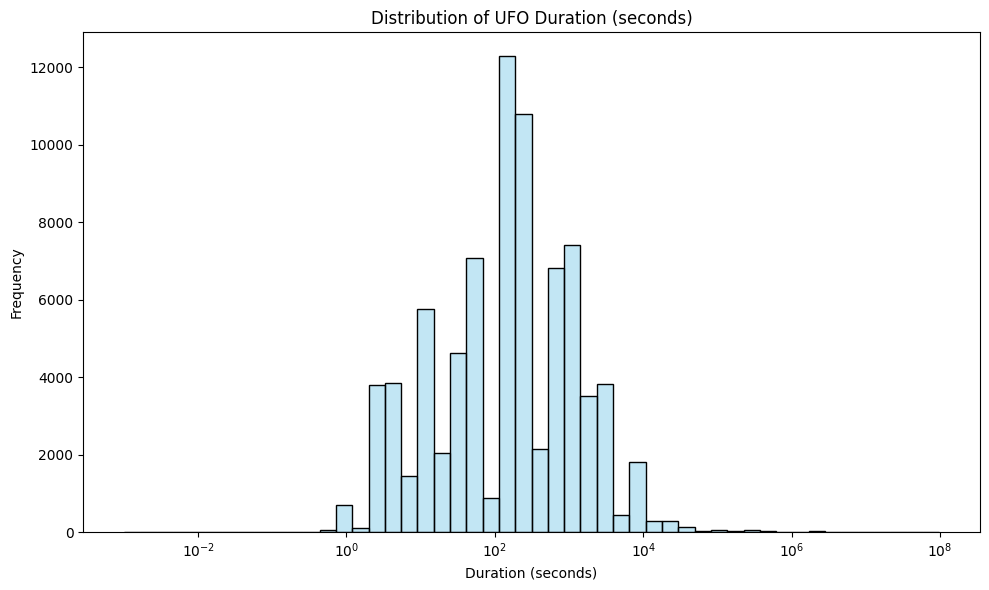

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate analysis for 'year'
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='year', palette='viridis')
plt.title('Distribution of UFO Sightings by Year')
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Univariate analysis for 'month'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='month', palette='viridis')
plt.title('Distribution of UFO Sightings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Sightings')
plt.tight_layout()
plt.show()

# Univariate analysis for 'hour'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='hour', palette='viridis')
plt.title('Distribution of UFO Sightings by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Sightings')
plt.tight_layout()
plt.show()

# Univariate analysis for 'shape' (top 10 shapes)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='shape', order=df['shape'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 UFO Shapes by Number of Sightings')
plt.xlabel('Number of Sightings')
plt.ylabel('Shape')
plt.tight_layout()
plt.show()

# Univariate analysis for 'country' (top 10 countries)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='country', order=df['country'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 Countries by Number of UFO Sightings')
plt.xlabel('Number of Sightings')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

# Univariate analysis for 'duration (seconds)' (histogram with log scale)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='duration (seconds)', bins=50, kde=True, log_scale=True, color='skyblue')
plt.title('Distribution of UFO Duration (seconds)')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

The univariate analysis provides insights into the distribution of sightings across different years, months, hours, shapes, and countries. We observe the increasing trend in sightings over the years, the summer seasonality, and the dominance of certain shapes and countries in the reports.

## Bivariate analysis

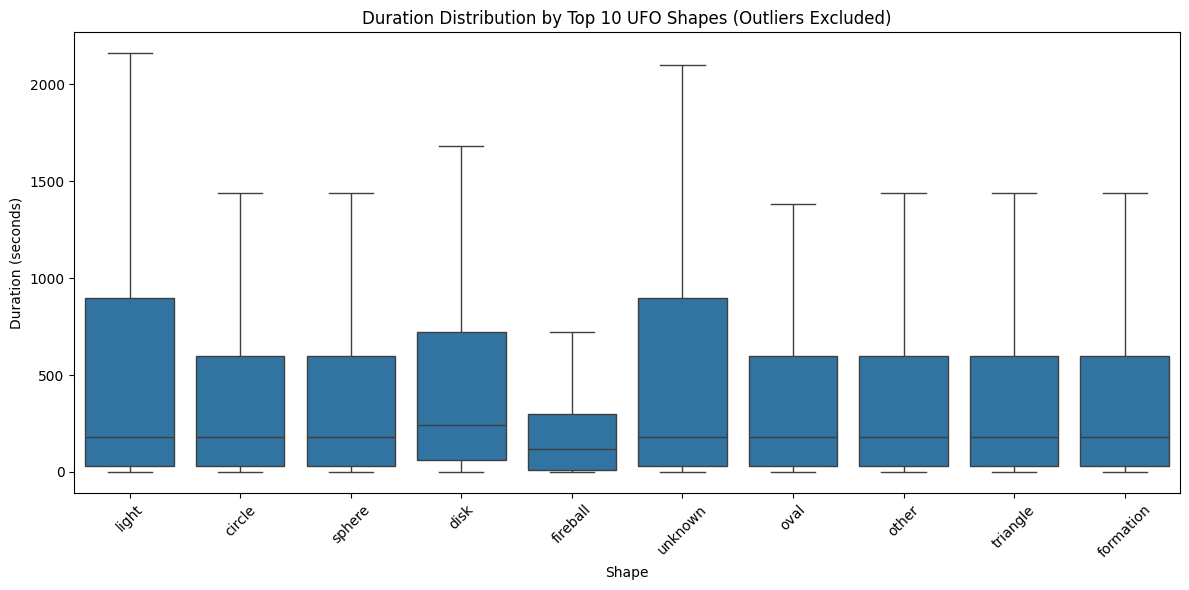

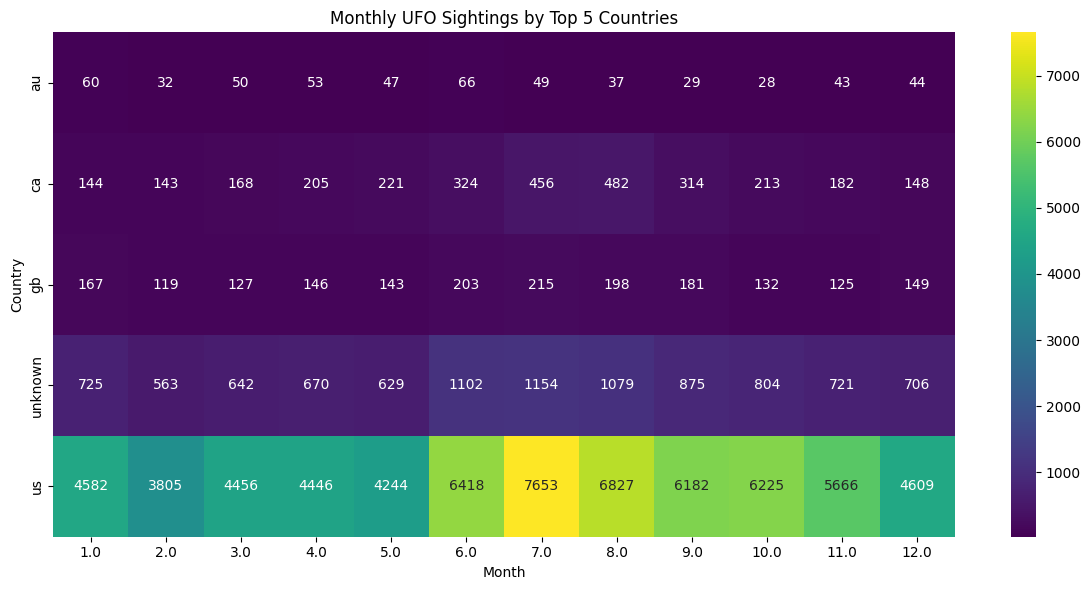

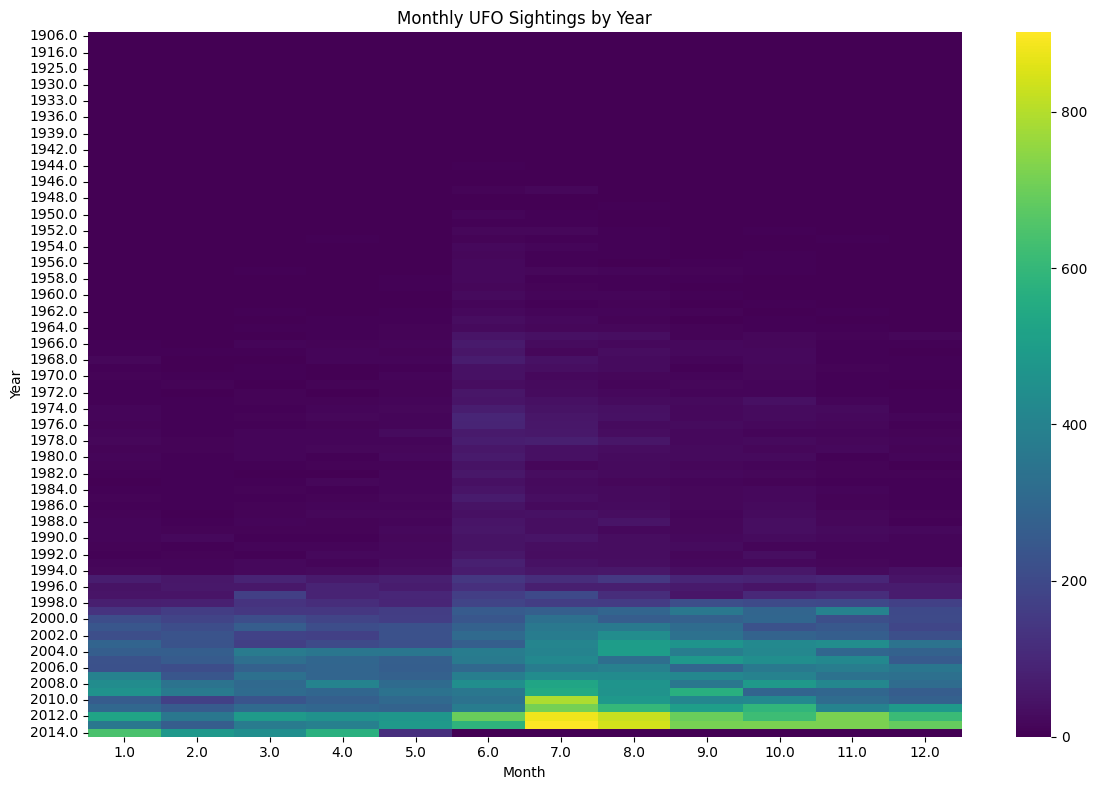

In [113]:
# Bivariate analysis: Shape by Duration (using boxplot for top shapes)
plt.figure(figsize=(12, 6))
top_shapes = df['shape'].value_counts().nlargest(10).index
sns.boxplot(data=df[df['shape'].isin(top_shapes)], x='shape', y='duration (seconds)', showfliers=False) # Exclude outliers for better visualization
plt.title('Duration Distribution by Top 10 UFO Shapes (Outliers Excluded)')
plt.xlabel('Shape')
plt.ylabel('Duration (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bivariate analysis: Country by Month (using heatmap for top countries)
plt.figure(figsize=(12, 6))
top_countries = df['country'].value_counts().nlargest(5).index
country_month_pivot = df[df['country'].isin(top_countries)].groupby(['country', 'month']).size().unstack(fill_value=0)
sns.heatmap(country_month_pivot, cmap='viridis', annot=True, fmt='d')
plt.title('Monthly UFO Sightings by Top 5 Countries')
plt.xlabel('Month')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

# Bivariate analysis: Year by Month (using heatmap)
plt.figure(figsize=(12, 8))
year_month_pivot = df.groupby(['year', 'month']).size().unstack(fill_value=0)
sns.heatmap(year_month_pivot, cmap='viridis')
plt.title('Monthly UFO Sightings by Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

Bivariate analysis revealed relationships between variables, such as the duration distribution across different shapes and the monthly sighting patterns for different countries and years, further highlighting the summer peak.

## Trend analysis

Yearly UFO Sightings:
 year
1906.0    1
1910.0    2
1916.0    1
1920.0    1
1925.0    1
Name: count, dtype: int64


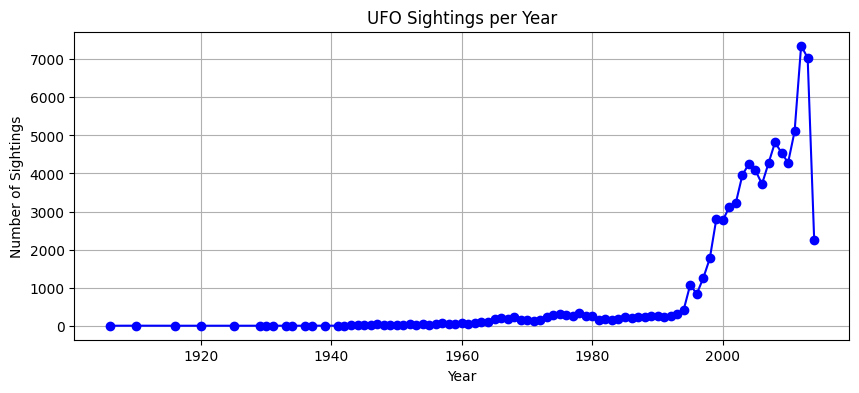


Monthly UFO Sightings:
 month
1.0     5689
2.0     4667
3.0     5449
4.0     5527
5.0     5292
6.0     8130
7.0     9542
8.0     8638
9.0     7588
10.0    7405
11.0    6740
12.0    5664
dtype: int64


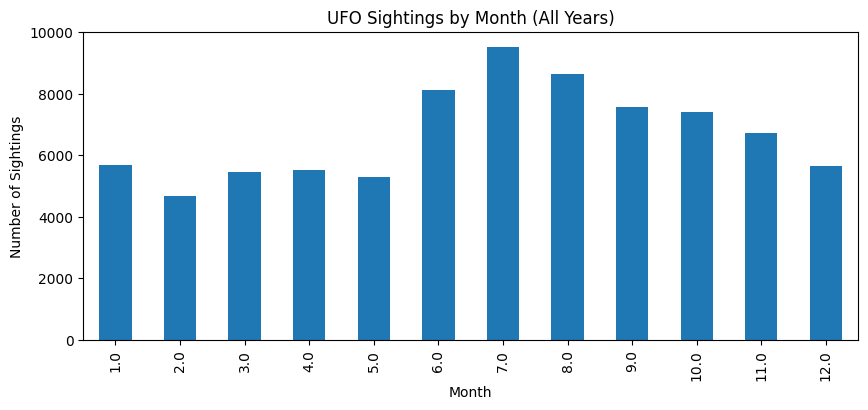

In [114]:
# Yearly counts of UFO sightings
yearly_counts = df['year'].value_counts().sort_index()

# Display the counts
print("Yearly UFO Sightings:\n", yearly_counts.head()) # Print head for brevity

# Plotting the trend of UFO sightings over the years
plt.figure(figsize=(10, 4))
yearly_counts.plot(kind='line', marker='o', color='blue')
plt.title('UFO Sightings per Year')
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.grid(True)
plt.show()

# Aggregating counts by month (1–12)
monthly_counts = df.groupby('month').size().sort_index()

# Display the monthly counts
print("\nMonthly UFO Sightings:\n", monthly_counts)

#Plotting the distribution
plt.figure(figsize=(10,4))
monthly_counts.plot(kind='bar')
plt.title('UFO Sightings by Month (All Years)')
plt.xlabel('Month')
plt.ylabel('Number of Sightings')
plt.show()

The trend analysis clearly shows the increase in UFO sightings over the years, with a significant rise in recent decades, and a consistent seasonal pattern with a peak in summer months.

## Advanced Visualizations

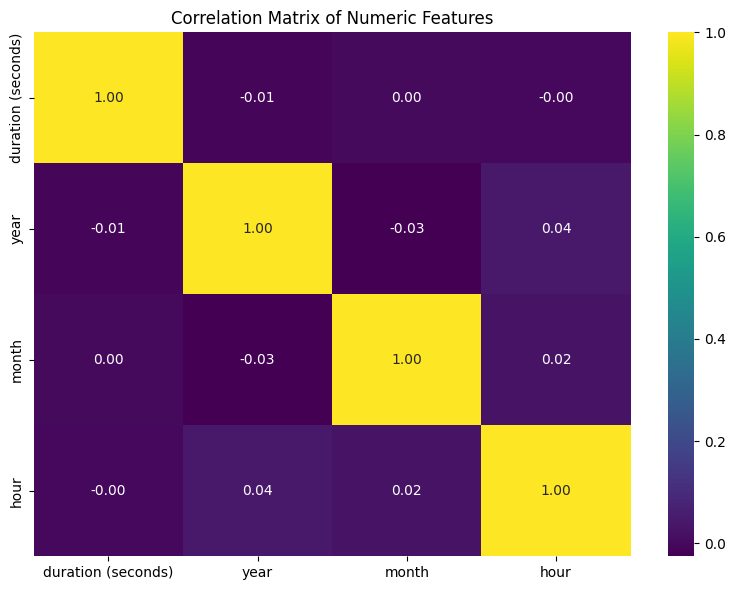

DataFrame columns: Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude', 'year', 'month', 'hour', 'duration_category'],
      dtype='object')


In [115]:
import folium
from folium.plugins import HeatMap
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Correlation heatmap of numeric features
num_cols = ['duration (seconds)', 'year', 'month', 'hour']
corr = df[num_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

# Geographical distribution heatmap
# Ensure latitude and longitude are numeric

# Strip whitespace from column names
df.columns = df.columns.str.strip()
print("DataFrame columns:", df.columns) # Print columns to diagnose

df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

# Drop rows with missing lat/lon
coords = df.dropna(subset=['latitude', 'longitude'])

# Prepare heat map data as a list of [lat, lon] pairs
heat_data = coords[['latitude', 'longitude']].values.tolist()

# Creating a base map centered at [0,0]
m = folium.Map(location=[0, 0],
               tiles='CartoDB positron',
               zoom_start=2)

# Adding the heatmap layer
HeatMap(
    heat_data,
    radius=8,     # adjust point radius
    blur=15,      # softer vs. sharper hotspots
    max_zoom=5
).add_to(m)

# Display the map
display(m)

# Note: Multi-faceted plots can be added here if specific interactions are to be explored further.

The correlation heatmap shows low correlation between numeric features. The geographical heatmap visually confirms that UFO sightings are concentrated in populated areas, particularly in the United States.

## Shape analysis

Top 10 UFO shapes:
 shape
light        16565
triangle      7865
circle        7608
unknown       7516
fireball      6208
other         5649
sphere        5387
disk          5213
oval          3733
formation     2457
Name: count, dtype: int64 



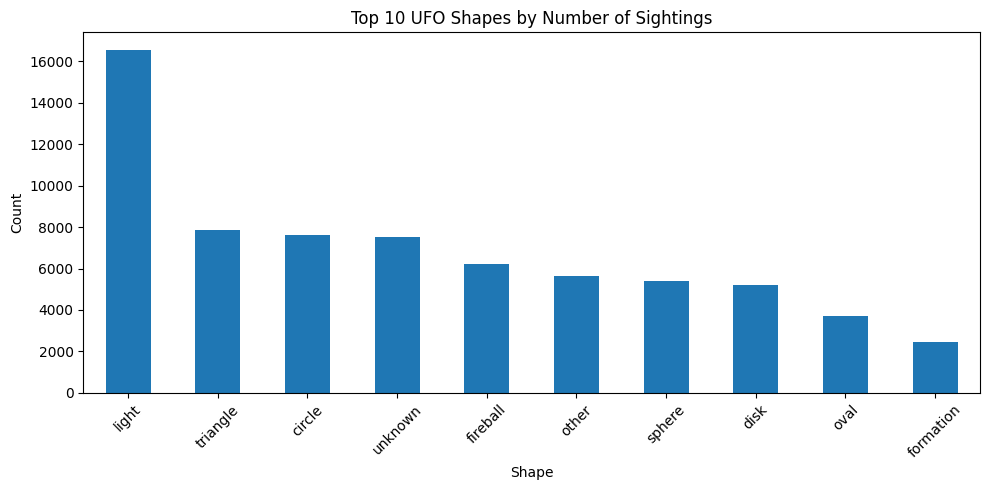


Top 20 words in 'light' comments:
 comments
light     7157
lights    4364
sky       4342
bright    2893
moving    2583
right     1883
white     1741
red       1451
orange    1342
object    1329
like      1218
star      1163
saw       1050
seen       993
night      900
ight       854
quot       830
ote        794
fast       780
speed      677
Name: count, dtype: int64

Likely mundane 'light' reports: 1468 (8.86%)


In [116]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as stopwords

# Counting the number of sightings by shape
shape_counts = df['shape'].value_counts()
print("Top 10 UFO shapes:\n", shape_counts.head(10), "\n")

# Plot the distribution of the top 10 shapes
plt.figure(figsize=(10,5))
shape_counts.head(10).plot(kind='bar')
plt.title('Top 10 UFO Shapes by Number of Sightings')
plt.xlabel('Shape')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analyze comments for the "light" shape category
lights = df[df['shape'] == 'light'].copy()

# Tokenize comments and get top 20 words
texts = lights['comments'].str.replace(r'[^a-z\s]', ' ', regex=True)
tokens = texts.str.split().explode()
tokens = tokens[tokens.str.len() > 2]           # drop very short tokens
tokens = tokens[~tokens.isin(stopwords)]        # drop stopwords
top_words = tokens.value_counts().head(20)
print("\nTop 20 words in 'light' comments:\n", top_words)

# Flag likely mundane 'light' reports
keywords = ['star','planet','venus','mars','iss','satellite',
            'airplane','helicopter','drone','lantern','flare']
pattern = rf'\b(?:{"|".join(keywords)})\b'
lights.loc[:, 'likely_mundane'] = lights['comments'].str.contains(pattern, regex=True, na=False)
print("\nLikely mundane 'light' reports:",
      lights['likely_mundane'].sum(),
      f"({lights['likely_mundane'].mean():.2%})")

Shape analysis revealed that "light" is the most common reported shape, and analysis of comments associated with "light" sightings suggests that a portion of these reports may be attributable to mundane objects.

## Analysing trends for US

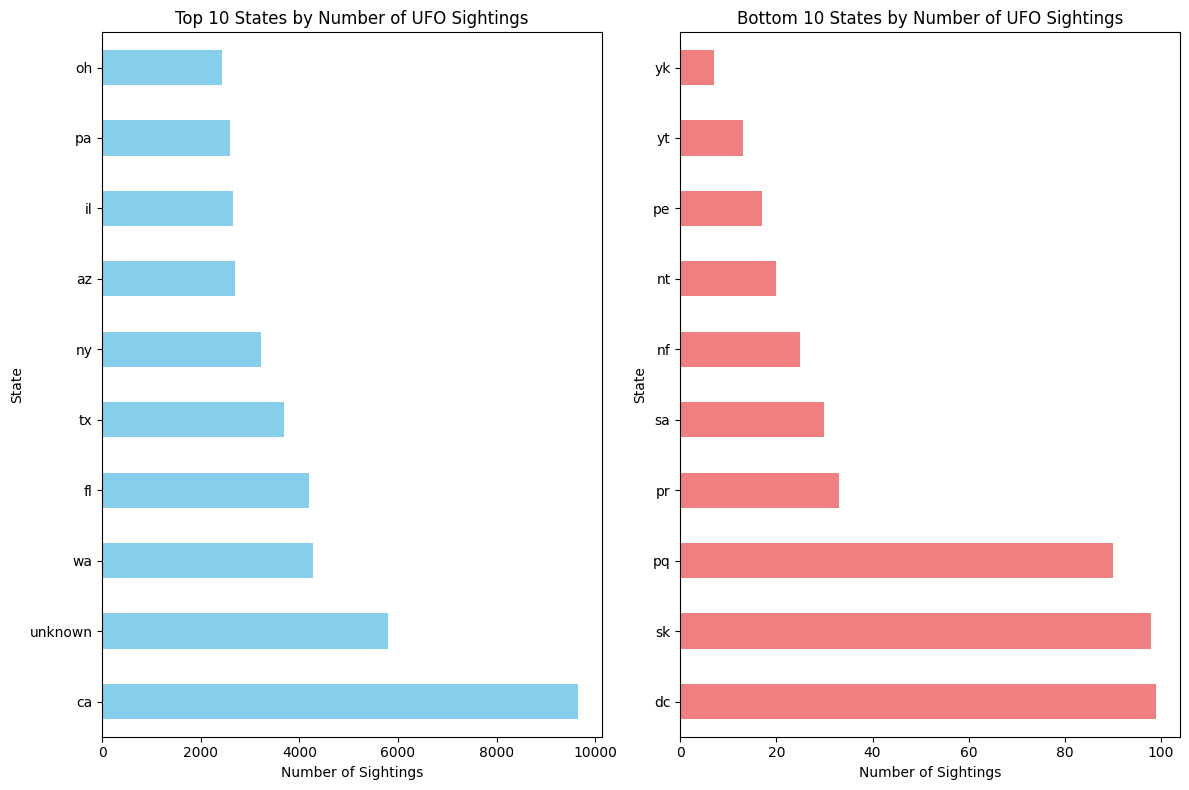

In [119]:

plt.figure(figsize=(12, 8))
state_counts = df['state'].value_counts()
top_states = state_counts.head(10)
least_states = state_counts.tail(10)

plt.subplot(1, 2, 1)
top_states.plot(kind='barh', color='skyblue')
plt.title('Top 10 States by Number of UFO Sightings')
plt.xlabel('Number of Sightings')
plt.ylabel('State')

plt.subplot(1, 2, 2)
least_states.plot(kind='barh', color='lightcoral')
plt.title('Bottom 10 States by Number of UFO Sightings')
plt.xlabel('Number of Sightings')
plt.ylabel('State')

plt.tight_layout()
plt.show()

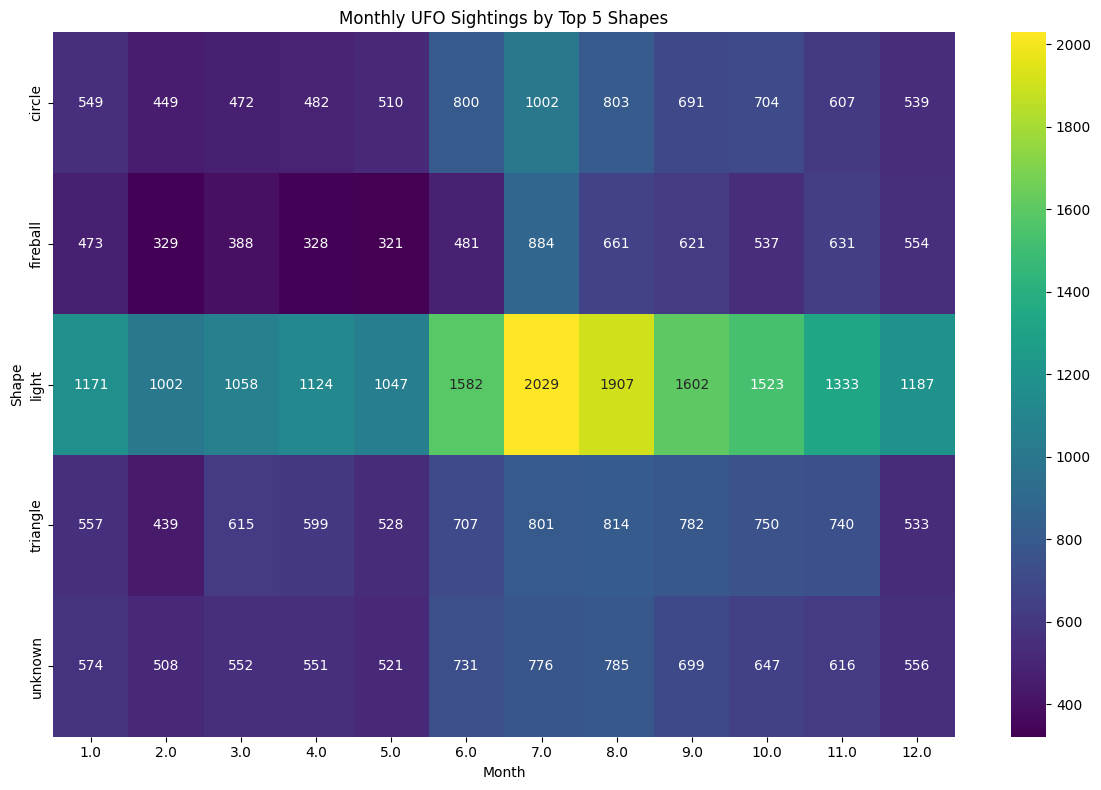

In [120]:
# Analysis for insight: The monthly heatmap reveals a pronounced summer peak (June–August) for all top shapes...
plt.figure(figsize=(12, 8))
top_shapes = df['shape'].value_counts().nlargest(5).index
shape_month_pivot = df[df['shape'].isin(top_shapes)].groupby(['shape', 'month']).size().unstack(fill_value=0)
sns.heatmap(shape_month_pivot, cmap='viridis', annot=True, fmt='d')
plt.title('Monthly UFO Sightings by Top 5 Shapes')
plt.xlabel('Month')
plt.ylabel('Shape')
plt.tight_layout()
plt.show()

## Conclusions and Recommendations

**Key Findings:**

*   **Temporal Trends:** UFO sightings show a significant increase over the years, with a notable peak in recent years (around 2012-2013). There is also a strong seasonality, with sightings peaking during the summer months (June-August).
*   **Geographical Distribution:** Sightings are heavily concentrated in the United States, particularly in highly populated states like California, Washington, and Florida. The global heatmap confirms that sighting density correlates with population density.
*   **Shape Analysis:** "Light" is the most frequently reported shape, but analysis of comments suggests a portion of these may be mundane objects like stars, planets, or aircraft. Other common shapes include "triangle," "circle," and "fireball."
*   **Duration:** The duration of sightings varies widely, with "triangle" sightings potentially having longer durations on average, although outliers in other categories ("light," "circle") indicate reporting inconsistencies.
*   **Correlations:** There is little to no linear correlation between numerical features like duration, year, month, and hour, suggesting these temporal factors influence sightings independently.
*   **Country/Month Interaction:** The summer peak in sightings is a global phenomenon, observed across the top reporting countries (US, Canada, UK, Australia), although the US accounts for the vast majority of reports year-round.

**Insights from analysis:**

*   It is observed from above that ufo signtings were more consistent from 1940s to 2000s but highest number of sightings were reported in 2013
*   Monthly UFO sightings indicate seasonality: the highest activity occurs in midsummer (June–August), peaking in July, while winter months see roughly 40–50% fewer reports. This is clear sign that favorable weather and increased outdoor activity drive the volume of sightings.
*   The U.S. (blue) dominates UFO reports by a wide margin in every month, peaking sharply in midsummer (July) with over 7,500 sightings. The ‘unknown’ category (orange) follows a very similar seasonal curve, suggesting that many unclassified reports occur with the same summer-driven cadence. Canada (green), the U.K. (red), and Australia (purple) register far fewer reports but also show their highest counts in June–August, consistent with northern-hemisphere summer patterns (and southern-hemisphere winter for Australia). Overall, there’s a clear global summer peak in UFO reporting
*   California leads UFO reports by a wide margin—driven by its huge population and active observers—while sparsely populated areas like D.C., Puerto Rico, and Alaska sit at the bottom with the fewest sightings.
*   The global heatmap of UFO sightings reveals that the most intense clusters coincide with highly populated urban and suburban areas and robust reporting networks.
*   These patterns indicate that the volume of reports is driven less by unique regional phenomena and more by observer density and the availability of channels for reporting.
*   The “light” category dominates UFO reports, but its broad, non-descriptive nature means many of those sightings are likely mundane misidentifications.
*   The correlation matrix indicates virtually no linear association among duration, year, month, and hour, so temporal features contribute independently.
*   Boxplots show “triangle” sightings have the longest and most variable durations, whereas “light” and “circle” have shorter medians but extreme outliers, highlighting data‐entry and reporting inconsistencies.
*   The monthly heatmap reveals a pronounced summer peak (June–August) for all top shapes, with “circle” leading in volume and “triangle”/“fireball” exhibiting the sharpest midsummer spikes.
*   These combined insights emphasize the need for shape‐specific duration filtering and seasonal adjustment to accurately characterize UFO sighting patterns


**Recommendations:**

*   **Data Quality:** Further investigation into the "unknown" shape category and the handling of extreme duration outliers is recommended to improve data quality and accuracy.
*   **Comment Analysis:** A more in-depth analysis of the comment text, perhaps using natural language processing (NLP) techniques, could help further categorize "light" sightings and identify other common themes or keywords associated with different shapes or locations.
*   **Geospatial Analysis:** While the heatmap provides a good overview, a more detailed geospatial analysis could explore sighting patterns within states or specific regions and potentially identify areas with unusually high or low reporting rates relative to population density.
*   **Predictive Modeling:** The cleaned and engineered data could be used to build predictive models to forecast future sighting trends based on temporal and geographical factors.
*   **Shape-Specific Analysis:** Given the differences in duration and potential misidentification, analyzing trends and characteristics for specific shapes (e.g., "triangle" vs. "circle") separately might yield more nuanced insights.
*   **Public Awareness/Reporting Bias:** Consider the impact of public awareness campaigns or media coverage on reporting frequency and explore ways to account for potential reporting biases in the data.